In [4]:
import pandas as pd 
import numpy as np

data = pd.read_excel('./데이터 병합.xlsx')

data.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,연월,시청률,기온(°C),강수량(mm)
0,20190101,06:00:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52,201901,0.0,-9.7,0.0
1,20190101,06:00:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109,201901,0.0,-9.7,0.0
2,20190101,06:20:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81,201901,0.0,-9.7,0.0
3,20190101,06:20:00,1,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174,201901,0.0,-9.7,0.0
4,20190101,06:40:00,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167,201901,0.0,-9.7,0.0


In [67]:
## 데이터 정보 파악
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 15 columns):
방송날짜       35379 non-null int64
방송시간       35379 non-null object
요일         35379 non-null int64
노출(분)      35379 non-null float64
마더코드       35379 non-null int64
상품코드       35379 non-null int64
상품명        35379 non-null object
상품군        35379 non-null object
판매단가       35379 non-null int64
취급액        35379 non-null int64
판매량        35379 non-null int64
연월         35379 non-null int64
시청률        35379 non-null float64
기온(°C)     35379 non-null float64
강수량(mm)    35379 non-null float64
dtypes: float64(4), int64(8), object(3)
memory usage: 4.0+ MB


In [68]:
## 방송시간 수치형으로 변환
data = data.astype({'방송시간': 'str'})
data = data.replace(':','',regex=True)
data = data.astype({'방송시간': 'int'})

## One hot Encoding
data = pd.get_dummies(columns=['상품군'],data=data)
data.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,판매단가,취급액,판매량,...,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20190101,60000,1,20.0,100346,201072,테이트 남성 셀린니트3종,39900,2099000,52,...,0,0,0,0,0,1,0,0,0,0
1,20190101,60000,1,20.0,100346,201079,테이트 여성 셀린니트3종,39900,4371000,109,...,0,0,0,0,0,1,0,0,0,0
2,20190101,62000,1,20.0,100346,201072,테이트 남성 셀린니트3종,39900,3262000,81,...,0,0,0,0,0,1,0,0,0,0
3,20190101,62000,1,20.0,100346,201079,테이트 여성 셀린니트3종,39900,6955000,174,...,0,0,0,0,0,1,0,0,0,0
4,20190101,64000,1,20.0,100346,201072,테이트 남성 셀린니트3종,39900,6672000,167,...,0,0,0,0,0,1,0,0,0,0


In [69]:
data.info()  # 바뀐 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 25 columns):
방송날짜        35379 non-null int64
방송시간        35379 non-null int32
요일          35379 non-null int64
노출(분)       35379 non-null float64
마더코드        35379 non-null int64
상품코드        35379 non-null int64
상품명         35379 non-null object
판매단가        35379 non-null int64
취급액         35379 non-null int64
판매량         35379 non-null int64
연월          35379 non-null int64
시청률         35379 non-null float64
기온(°C)      35379 non-null float64
강수량(mm)     35379 non-null float64
상품군_가구      35379 non-null uint8
상품군_가전      35379 non-null uint8
상품군_건강기능    35379 non-null uint8
상품군_농수축     35379 non-null uint8
상품군_생활용품    35379 non-null uint8
상품군_속옷      35379 non-null uint8
상품군_의류      35379 non-null uint8
상품군_이미용     35379 non-null uint8
상품군_잡화      35379 non-null uint8
상품군_주방      35379 non-null uint8
상품군_침구      35379 non-null uint8
dtypes: float64(4), int32(1), int64(8), object(1), uint8(

In [70]:
data.columns

Index(['방송날짜', '방송시간', '요일', '노출(분)', '마더코드', '상품코드', '상품명', '판매단가', '취급액',
       '판매량', '연월', '시청률', '기온(°C)', '강수량(mm)', '상품군_가구', '상품군_가전', '상품군_건강기능',
       '상품군_농수축', '상품군_생활용품', '상품군_속옷', '상품군_의류', '상품군_이미용', '상품군_잡화',
       '상품군_주방', '상품군_침구'],
      dtype='object')

In [71]:
data['id']=range(len(data)) ## id 생성
data = data[['id', '방송날짜', '방송시간', '요일', '노출(분)', '마더코드', '상품코드', '상품명', '판매단가', '취급액',
       '판매량', '연월', '시청률', '기온(°C)', '강수량(mm)', '상품군_가구', '상품군_가전', '상품군_건강기능',
       '상품군_농수축', '상품군_생활용품', '상품군_속옷', '상품군_의류', '상품군_이미용', '상품군_잡화',
       '상품군_주방', '상품군_침구']]

train = data.sample(28000,replace=False,random_state=2020).reset_index().drop(['index'],axis=1)
test = data.loc[ ~data['id'].isin(train['id']) ].reset_index().drop(['index'],axis=1)

In [75]:
## input 변수 지정

input_var = ['방송날짜', '방송시간', '요일', '노출(분)', '마더코드', '상품코드', '판매단가',
             '시청률', '기온(°C)', '강수량(mm)','상품군_가구', '상품군_가전', '상품군_건강기능',
             '상품군_농수축', '상품군_생활용품', '상품군_속옷', '상품군_의류', '상품군_이미용',
             '상품군_잡화', '상품군_주방', '상품군_침구']  
# 예측변수와의 상관계수 너무 높은 변수 제거 : 판매량
# 상품명은 상품코드와 중복되기 때문에 넣지 않음

In [73]:
## 상관계수 파악
corr = train[input_var].corr()
corr.style.background_gradient(cmap='RdBu_r')

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,판매단가,시청률,기온(°C),강수량(mm),상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
방송날짜,1,-0.00689235,-0.0121161,-0.0447848,-0.0886629,-0.104484,-0.0371265,0.181727,0.257185,0.0581704,-0.00100769,-0.109164,0.0230233,0.025892,0.14647,-0.0566038,-0.037312,0.0685094,0.079112,-0.0602963,0.0304422
방송시간,-0.00689235,1,-0.0017038,-0.00571425,-0.0994118,-0.100204,0.328258,0.00816521,0.0746035,0.00232697,0.237916,0.358428,-0.0928308,0.071371,-0.0437589,-0.0917368,-0.196505,-0.0780981,-0.211255,-0.00564622,-0.0530336
요일,-0.0121161,-0.0017038,1,-0.00808079,-0.0302859,-0.0308538,0.0639296,-0.00130157,0.0161169,-0.0203338,-0.018443,0.0784197,-0.0131363,-0.0369333,-0.00261885,-0.0128223,0.0506463,0.00377937,-0.000671071,-0.0447742,-0.0327991
노출(분),-0.0447848,-0.00571425,-0.00808079,1,0.0904026,0.0819182,0.128149,0.00817912,0.00846993,0.00904609,-0.00793211,-0.033667,-0.00716591,-0.0818013,0.0240701,-0.030328,-0.0680606,-0.0290501,0.179305,0.0416812,-0.000383914
마더코드,-0.0886629,-0.0994118,-0.0302859,0.0904026,1,0.978201,-0.206608,-0.0231582,-0.0946258,-0.0079699,-0.088229,-0.258512,0.0318537,0.0445699,0.0116666,0.0923884,-0.0282006,-0.0582203,0.0300295,0.229076,-0.118615
상품코드,-0.104484,-0.100204,-0.0308538,0.0819182,0.978201,1,-0.217958,-0.0249587,-0.112905,-0.0106274,-0.079655,-0.272873,0.0285934,0.0513667,0.010585,0.096764,-0.0138188,-0.051397,0.0180885,0.228928,-0.133909
판매단가,-0.0371265,0.328258,0.0639296,0.128149,-0.206608,-0.217958,1,-0.0177185,0.0101307,0.0107614,0.169488,0.71552,-0.0716705,-0.190943,-0.0986538,-0.174139,-0.139052,-0.104108,0.00772988,-0.180301,-0.0684637
시청률,0.181727,0.00816521,-0.00130157,0.00817912,-0.0231582,-0.0249587,-0.0177185,1,0.083597,0.0848401,-0.0148869,-0.0440689,-0.0243972,0.0577376,-0.0017849,-0.0260593,-0.00327254,0.00156581,0.0600595,-0.00384696,-0.0207528
기온(°C),0.257185,0.0746035,0.0161169,0.00846993,-0.0946258,-0.112905,0.0101307,0.083597,1,0.103999,0.00247594,-0.031636,-0.0207477,0.0812991,-0.0664076,-0.0455163,-0.0481487,-0.0246924,0.0924227,-0.0056806,0.106138
강수량(mm),0.0581704,0.00232697,-0.0203338,0.00904609,-0.0079699,-0.0106274,0.0107614,0.0848401,0.103999,1,0.013247,0.00716018,0.00760286,-0.00127513,-0.00469629,-0.0236144,-0.0224777,-0.00259942,0.0412601,-0.00441494,-0.00674882


## 1. Xgboost

In [ ]:
## xgboost 패키지 설치 
!pip install xgboost

In [76]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae

## 최적의 n_estimators 찾기
for n in [100,200,300,400,500,600,700,800,900, 1000]:
    xgb = XGBRegressor( n_estimators = n, learning_rate = 0.1)
    xgb.fit(train[input_var], train['취급액'])
    predictions = xgb.predict(test[input_var])
    print(str(n)+' mae : '+str(mae(test['취급액'], predictions)))  ## 예측값 차이 계산

100 mae : 8866519.749625204
200 mae : 7865115.509896115
300 mae : 7376816.344863803
400 mae : 7084334.709960805
500 mae : 6920005.909923855
600 mae : 6794768.655865409
700 mae : 6691672.5686792
800 mae : 6603136.635765348
900 mae : 6543794.88494634
1000 mae : 6501127.392856708


In [78]:
## 변수 중요도 시각화를 위한 패키지 설정
import platform 
from matplotlib import font_manager, rc

## 한글 폰트 설정
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

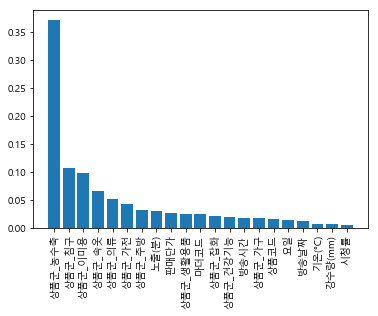

In [79]:
## 제작된 모델의 변수중요도를 살펴봅니다.
xgb.feature_importances_

imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})

## 중요한 변수 순서대로 나열합니다.
imp_df = imp_df.sort_values(['imp'],ascending=False)

## 변수중요도 그래프
import matplotlib.pyplot as plt
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)

In [81]:
import numpy as np
score_list=[]
selected_varnum=[]

## 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation을 실행시킵니다.
## cross validation 결과물을 score_list에 저장합니다.
for i in range(1,22):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['취급액'], 
                             scoring="neg_mean_absolute_error", cv=5)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)

score_list 

[13908566.422285715,
 13847755.907214284,
 13583647.1705,
 13465766.240714286,
 13355576.478785714,
 13357823.835642856,
 13353121.64042857,
 12997180.234703124,
 10760219.082553294,
 10660385.117032714,
 9808826.270566965,
 9811264.653162528,
 9801460.484562362,
 8139051.916631356,
 8135928.3725874545,
 7432010.877082345,
 7154446.44125061,
 6441299.265070347,
 6543551.224654789,
 6553288.463916888,
 6699093.286110379]

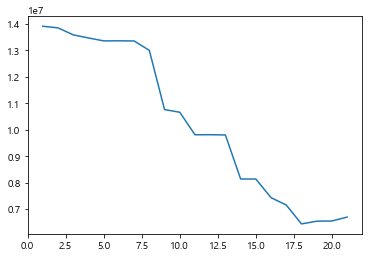

In [82]:
## 선택 변수에 따른 cross validation score 시각화
plt.plot(selected_varnum, score_list)
# mse 최저점인 변수 조합 선택

In [83]:
## 입력 변수 재설정 = 중요 변수 상위 18개
input_var = ['방송날짜', '방송시간', '요일', '노출(분)', 
             '마더코드', '상품코드', '판매단가','상품군_가구',
             '상품군_가전', '상품군_건강기능', '상품군_농수축',
             '상품군_생활용품', '상품군_속옷','상품군_의류', 
             '상품군_이미용', '상품군_잡화','상품군_주방', '상품군_침구']  

In [84]:
## 최적의 n_estimators 찾기
for n in [100,200,300,400,500,600,700,800,900, 1000]:
    xgb = XGBRegressor( n_estimators = n, learning_rate = 0.1)
    xgb.fit(train[input_var],train['취급액'])
    predictions = xgb.predict(test[input_var])
    print(str(n)+' mae : '+str(mae(test['취급액'], predictions)))  ## 예측값 차이 계산

100 mae : 8771795.89439626
200 mae : 7733201.624267346
300 mae : 7176759.401459861
400 mae : 6873240.4231253145
500 mae : 6662926.671755891
600 mae : 6547319.890952948
700 mae : 6451103.166157894
800 mae : 6375198.152779623
900 mae : 6325185.086519778
1000 mae : 6282009.607722096


<strong> n = 1000일 때, mae = 6282009.607722096

## 2. K-Nearest Neighbor  (KNN)

In [87]:
# knn 회귀 모델 생성
from sklearn.neighbors import KNeighborsRegressor

## 최적의 k찾기
for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit( train[input_var] , train['취급액'] )
    predictions = knn.predict( test[input_var] )
    print(str(k)+' mae : '+str(mae(test['취급액'], predictions)))

1 mae : 10961137.281474454
2 mae : 10007550.074535845
3 mae : 9970488.955142973
4 mae : 10034400.121967746
5 mae : 10118438.29787234
6 mae : 10210997.425125355
7 mae : 10302601.53330881
8 mae : 10394357.077517278
9 mae : 10450533.255033052
10 mae : 10517784.754031712
11 mae : 10582944.695635034
12 mae : 10618857.760762522
13 mae : 10668656.249022692
14 mae : 10726472.566937061
15 mae : 10785217.454939693
16 mae : 10829741.021818675
17 mae : 10876491.864831038
18 mae : 10938513.717607023
19 mae : 10986179.38531109
20 mae : 11013594.924786557
21 mae : 11050047.154408585
22 mae : 11090316.370781949
23 mae : 11115901.276831431
24 mae : 11149722.449970637
25 mae : 11175048.163707819
26 mae : 11210681.278472172
27 mae : 11238959.404315552
28 mae : 11270121.754786752
29 mae : 11305639.241837274


In [100]:
## cross validation

knn = KNeighborsRegressor(n_neighbors=3)
scores = cross_val_score(knn, train[input_var], train['취급액'], scoring="neg_mean_absolute_error", cv=10)
## cv : 데이터 분할 개수 (몇 등분 할건지)

print(-np.mean(scores))

10235555.98809524


## 예측 데이터 적용

In [118]:
data1 = pd.read_excel('./예측데이터 전처리.xlsx')
data1.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,20200601,06:20:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,20200601,06:40:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,20200601,07:00:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,20200601,07:20:00,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,20200601,07:40:00,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [119]:
## 방송시간 수치형으로 변환
data1 = data1.astype({'방송시간': 'str'})
data1 = data1.replace(':','',regex=True)
data1 = data1.astype({'방송시간': 'int'})

## One hot Encoding
data1 = pd.get_dummies(columns=['상품군'],data=data1)
data1.head()

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,판매단가,취급액,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20200601,62000,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,59800,NaN,0,0,0,0,0,0,1,0,0,0,0
1,20200601,64000,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,59800,NaN,0,0,0,0,0,0,1,0,0,0,0
2,20200601,70000,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,59800,NaN,0,0,0,0,0,0,1,0,0,0,0
3,20200601,72000,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,69900,NaN,0,0,0,0,0,1,0,0,0,0,0
4,20200601,74000,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,69900,NaN,0,0,0,0,0,1,0,0,0,0,0


In [120]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 20 columns):
방송날짜        2716 non-null int64
방송시간        2716 non-null int32
요일          2716 non-null int64
노출(분)       2716 non-null int64
마더코드        2716 non-null int64
상품코드        2716 non-null int64
상품명         2716 non-null object
판매단가        2716 non-null int64
취급액         0 non-null float64
상품군_가구      2716 non-null uint8
상품군_가전      2716 non-null uint8
상품군_건강기능    2716 non-null uint8
상품군_농수축     2716 non-null uint8
상품군_생활용품    2716 non-null uint8
상품군_속옷      2716 non-null uint8
상품군_의류      2716 non-null uint8
상품군_이미용     2716 non-null uint8
상품군_잡화      2716 non-null uint8
상품군_주방      2716 non-null uint8
상품군_침구      2716 non-null uint8
dtypes: float64(1), int32(1), int64(6), object(1), uint8(11)
memory usage: 209.6+ KB


In [121]:
submission = pd.read_excel('./예측데이터 전처리.xlsx')

In [122]:
## Xgboost 모델 적용
Test = data1

xgb = XGBRegressor( n_estimators = 1000, learning_rate = 0.1)
xgb.fit(train[input_var],train['취급액'])
Test['취급액'] = xgb.predict(Test[input_var])
submission['취급액'] = Test['취급액']

submission

,방송날짜,방송시간,요일,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,20200601,06:20:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,25140052.0
1,20200601,06:40:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,34783260.0
2,20200601,07:00:00,0,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,46815760.0
3,20200601,07:20:00,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,31720092.0
4,20200601,07:40:00,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,33703332.0
5,20200601,08:00:00,0,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,38934904.0
6,20200601,08:20:00,0,20,100381,201247,바비리스 퍼펙트 볼륨스타일러,이미용,59000,15146118.0
7,20200601,08:40:00,0,20,100381,201247,바비리스 퍼펙트 볼륨스타일러,이미용,59000,23794234.0
8,20200601,09:00:00,0,20,100381,201247,바비리스 퍼펙트 볼륨스타일러,이미용,59000,30196634.0
9,20200601,09:20:00,0,20,100638,201956,램프쿡 자동회전냄비,주방,109000,52658504.0


In [127]:
submission.isnull().sum()

방송날짜     0
방송시간     0
요일       0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
취급액      0
dtype: int64

In [128]:
submission = submission.astype({'취급액': 'int'})

submission.to_excel('./submission.xlsx', index = False)